todo
- groupby day

In [56]:
!ls ~/nem-data/clean

dispatch_price.csv predispatch.csv    unit_scada.csv
p5min.csv          trading_price.csv


In [1]:
import matplotlib.pyplot as plt

In [68]:
import os

import pandas as pd

# pd interface
def load_csv(path):
    return pd.read_csv(path, parse_dates=True, index_col=0)
        
home = os.environ['HOME']
                       
def load_data():
    return {
        'trading': load_csv(os.path.join(home, 'nem-data', 'clean', 'trading_price.csv')),
        'predispatch': load_csv(os.path.join(home, 'nem-data', 'clean', 'predispatch.csv'))
    }

data = load_data()

trading = data['trading']
trading.tail(2)

,RRP NSW1,RRP QLD1,RRP SA1,RRP TAS1,RRP VIC1
tempus_interval_time,,,,,
2018-08-31 23:00:00,132.84,96.94,110.90,9.83,127.40
2018-08-31 23:30:00,117.10,87.67,105.57,13.75,115.37


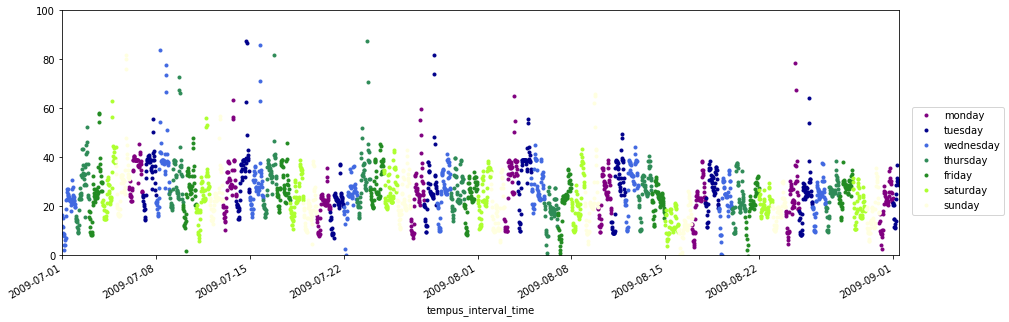

In [93]:
def plot_weekdays(data, week_days):
    fig, ax = plt.subplots(figsize=(15, 5))

    color = np.random.rand(data.shape[0], 4).reshape(-1, 4)

    days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
    # https://matplotlib.org/3.1.0/gallery/color/named_colors.html
    colors = ['purple', 'darkblue', 'royalblue', 'seagreen', 'forestgreen', 'greenyellow', 'lightyellow']

    for color, day, name in zip(colors, set(week_days), days):
        mask = week_days == day
        data.loc[mask, 'RRP SA1'].plot(ax=ax, linestyle='None', marker='o', markersize=3, color=color, label=name)

    ax.set_ylim([0, 100])
    fig.legend(loc='right')
    
plot_weekdays(trading.iloc[:3000, :], week_days=trading.iloc[:3000, :].index.dayofweek)

In [66]:
predispatch = data['predispatch']

In [67]:
predispatch.head()

,RRP 0 days 00:00:00 NSW1,RRP 0 days 00:00:00 QLD1,RRP 0 days 00:00:00 SA1,RRP 0 days 00:00:00 TAS1,RRP 0 days 00:00:00 VIC1,RRP 0 days 00:30:00 NSW1,RRP 0 days 00:30:00 QLD1,RRP 0 days 00:30:00 SA1,RRP 0 days 00:30:00 TAS1,RRP 0 days 00:30:00 VIC1,...,RRP 0 days 15:00:00 NSW1,RRP 0 days 15:00:00 QLD1,RRP 0 days 15:00:00 SA1,RRP 0 days 15:00:00 TAS1,RRP 0 days 15:00:00 VIC1,RRP 0 days 15:30:00 NSW1,RRP 0 days 15:30:00 QLD1,RRP 0 days 15:30:00 SA1,RRP 0 days 15:30:00 TAS1,RRP 0 days 15:30:00 VIC1
2009-07-01 04:00:00,6.72958,6.54955,4.27395,5.65893,5.69570,12.00000,12.38159,8.23795,9.08806,9.20000,...,27.61992,24.68000,32.25657,28.18352,28.60674,25.01000,23.17831,26.37451,23.60285,23.95728
2009-07-01 04:30:00,12.00000,12.28786,8.31984,9.16057,9.20000,15.53934,16.31000,8.93877,9.84953,9.84000,...,25.01000,23.17831,26.37412,23.53836,23.95570,23.37501,21.98008,24.59522,21.69284,22.07745
2009-07-01 05:00:00,15.26723,16.31000,8.32665,9.13640,9.20000,18.50429,18.00000,8.94612,9.76998,12.21235,...,23.27202,21.98008,24.48718,21.64842,21.97351,22.00000,21.44446,23.22571,20.34131,20.64676
2009-07-01 05:30:00,17.68750,18.00000,0.00006,9.58332,11.22721,22.00000,21.79578,13.96710,15.05664,16.54103,...,22.00000,21.44274,23.22560,20.23273,20.64666,22.00000,21.88408,22.92051,19.84987,20.37545
2009-07-01 06:00:00,22.00000,21.63789,11.87923,15.38253,16.66234,22.00040,21.97000,12.84656,18.22881,18.35571,...,22.00000,21.88415,22.44997,19.70622,20.22807,22.00000,21.38952,21.97115,18.86277,19.00000


In [ ]:
gi